In [1]:
import zipfile, os
local_zip = 'dataset.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()
zip_ref.close()

In [2]:
from distutils.dir_util import copy_tree, remove_tree

base_dir = "Alzheimer_s Dataset/"
root_dir = "./"
test_dir = base_dir + "test/"
train_dir = base_dir + "train/"
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
    remove_tree(work_dir)
    

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


Found 6400 images belonging to 4 classes.
(6400, 128, 128, 3) (6400, 4)


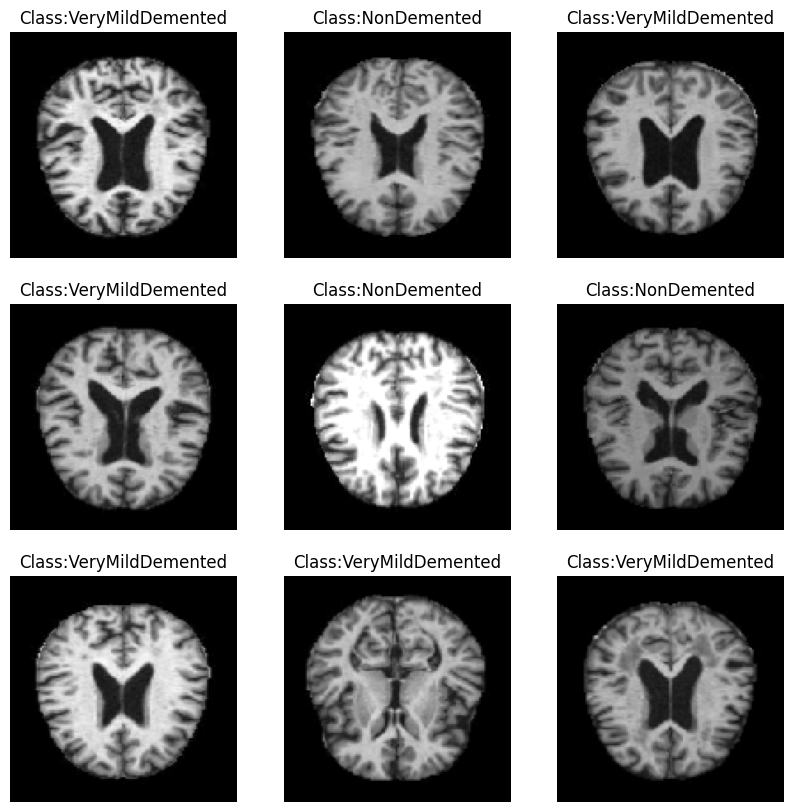

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
import matplotlib.pyplot as plt
from random import randint
import numpy as np

ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(
    rescale = 1./255, 
    brightness_range=BRIGHT_RANGE, 
    zoom_range=ZOOM, 
    data_format=DATA_FORMAT, 
    fill_mode=FILL_MODE, 
    horizontal_flip=HORZ_FLIP)
WORK_DIR = './dataset/'
IMG_SIZE = 128
IMAGE_SIZE = [128, 128]
DIM = (IMG_SIZE, IMG_SIZE)
train_data_gen = work_dr.flow_from_directory(
    directory=WORK_DIR, 
    target_size=DIM, 
    batch_size=6400, 
    shuffle=False)

def show_images(generator,y_pred=None):
    """
    Input: An image generator,predicted labels (optional)
    Output: Displays a grid of 9 images with lables
    """
    
    # get image lables
    Classes = [ 'MildDemented',
            'ModerateDemented',
            'NonDemented',
            'VeryMildDemented']
    labels =dict(zip([0,1,2,3], Classes))
    
    # get a batch of images
    x,y = generator.next()
    
    # display a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, 6400)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))
                                                     
    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))
    
# Display Train Images
show_images(train_data_gen)
# Memasukan data
train_data, train_labels = train_data_gen.next()
print(train_data.shape, train_labels.shape)

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=11)
print(len(train_data), len(test_data))

5120 1280


In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (128, 128, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(500, activation = 'relu'),
          tf.keras.layers.Dense(200, activation = 'relu'),
          tf.keras.layers.Dense(4, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [6]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                              loss=tf.losses.CategoricalCrossentropy(),
                              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=50, 
                    validation_data=(test_data, test_labels))

Epoch 1/50
160/160 [==============================] - 194s 1s/step - loss: 1.0239 - accuracy: 0.4951 - val_loss: 0.8988 - val_accuracy: 0.5602
Epoch 2/50
160/160 [==============================] - 191s 1s/step - loss: 0.9193 - accuracy: 0.5613 - val_loss: 0.8832 - val_accuracy: 0.5883
Epoch 3/50
160/160 [==============================] - 189s 1s/step - loss: 0.8460 - accuracy: 0.5916 - val_loss: 0.7903 - val_accuracy: 0.6234
Epoch 4/50
160/160 [==============================] - 191s 1s/step - loss: 0.7558 - accuracy: 0.6479 - val_loss: 0.7675 - val_accuracy: 0.6359
Epoch 5/50
160/160 [==============================] - 186s 1s/step - loss: 0.6179 - accuracy: 0.7229 - val_loss: 0.6487 - val_accuracy: 0.7016
Epoch 6/50
160/160 [==============================] - 202s 1s/step - loss: 0.4781 - accuracy: 0.7932 - val_loss: 0.5236 - val_accuracy: 0.7773
Epoch 7/50
160/160 [==============================] - 205s 1s/step - loss: 0.3205 - accuracy: 0.8693 - val_loss: 0.5507 - val_accuracy: 0.7867

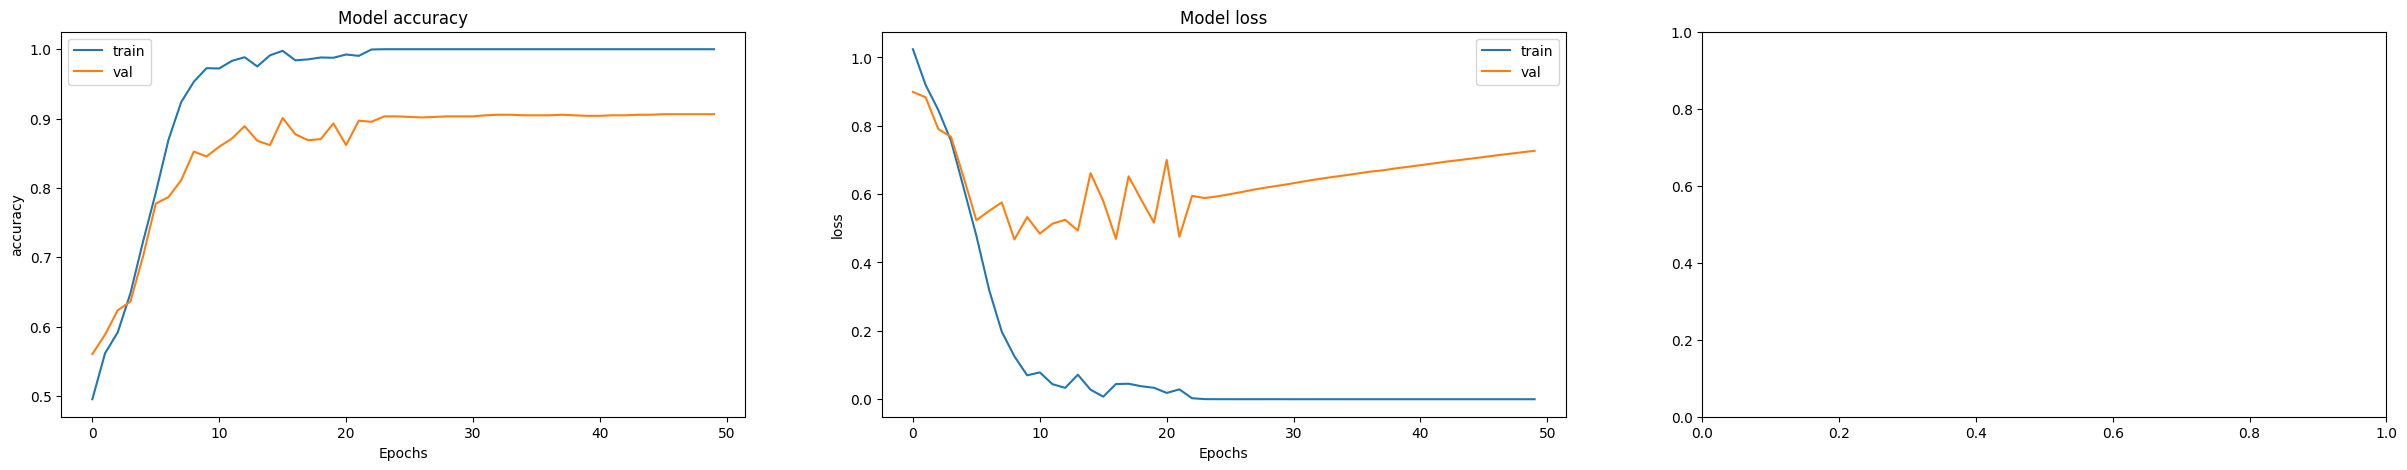

In [7]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

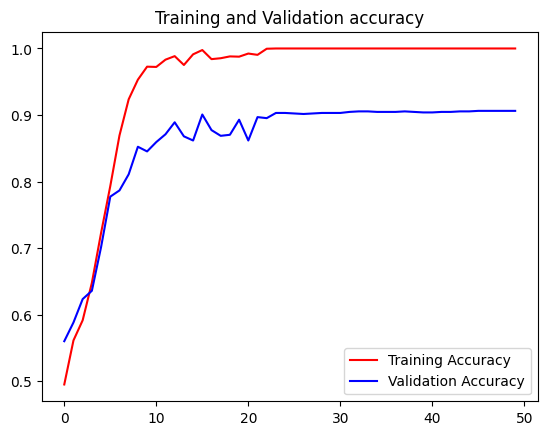

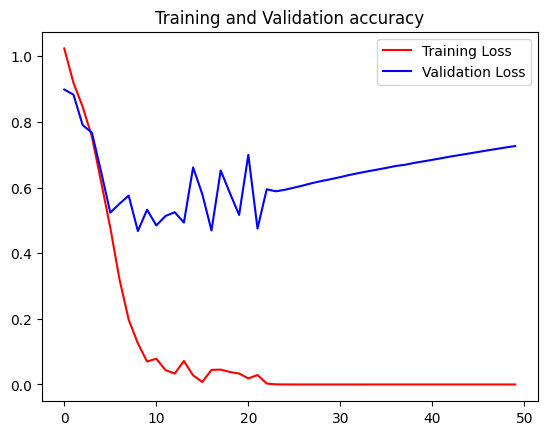

In [8]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

In [9]:
#Evaluating the model on the data

#train_scores = model.evaluate(train_data, train_labels)
#val_scores = model.evaluate(val_data, val_labels)
test_scores = model.evaluate(test_data, test_labels)

#print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
#print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

40/40 [==============================] - 7s 183ms/step - loss: 0.7267 - accuracy: 0.9062
Testing Accuracy: 90.62%


In [11]:
#Predicting the test data

pred_labels = model.predict(test_data)

40/40 [==============================] - 7s 180ms/step


In [15]:
#Print the classification report of the tested data

#Since the labels are softmax arrays, we need to roundoff to have it in the form of 0s and 1s,
#similar to the test_labels
from sklearn.metrics import classification_report, confusion_matrix
def roundoff(arr):
    """To round off according to the argmax of each predicted label array. """
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels, target_names=[ 'MildDemented',
            'ModerateDemented',
            'NonDemented',
            'VeryMildDemented']))

                  precision    recall  f1-score   support

    MildDemented       0.91      0.85      0.88       190
ModerateDemented       1.00      1.00      1.00         7
     NonDemented       0.95      0.92      0.93       660
VeryMildDemented       0.85      0.91      0.88       423

       micro avg       0.91      0.91      0.91      1280
       macro avg       0.93      0.92      0.92      1280
    weighted avg       0.91      0.91      0.91      1280
     samples avg       0.91      0.91      0.91      1280



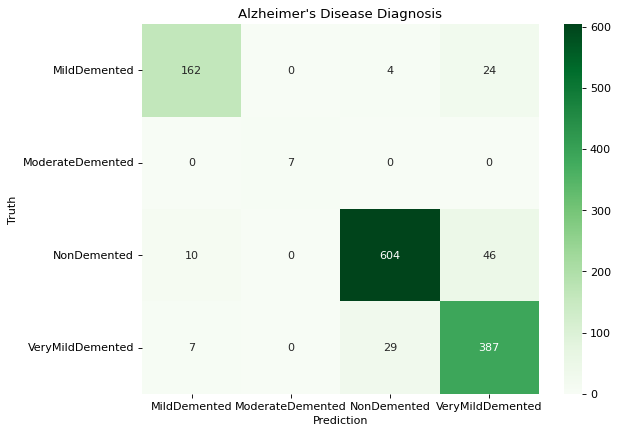

In [17]:
import seaborn as sns
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels= [ 'MildDemented',
            'ModerateDemented',
            'NonDemented',
            'VeryMildDemented'],
                yticklabels=[ 'MildDemented',
            'ModerateDemented',
            'NonDemented',
            'VeryMildDemented'])

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [23]:
model.save('modelAlzheimer.h5')